In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cur_dir = os.getcwd()
fruit_list = ['Apple','Banana','Pineapple']
fruit_npy = []
for fruit_name in fruit_list:
    folder_name = cur_dir + '\\' + fruit_name
    file_list = os.listdir(folder_name)
    
    for file_name in file_list:
        img = mpimg.imread(folder_name + '\\' + file_name)
        
        R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
        imgGray = 0.299 * R + 0.587 * G + 0.114 * B
        imgGray = np.array(imgGray, dtype = 'int')  # 이때까지 0에 가까운값이 어두운 값이다
        imgGray2 = 255 - imgGray  # 이제 검은색부분을 큰 값으로 만들고  흰색 부분을 0 값으로 바꿈
        
        fruit_npy.append(imgGray2)
        
fruit_npy = np.array(fruit_npy)
print(fruit_npy.shape)

(1470, 100, 100)


In [32]:
np.save('fruits.npy', fruit_npy)


In [33]:
fruits = np.load('fruits.npy')
print(fruits.shape)

(1470, 100, 100)


In [34]:
#  3차원의 배열 --> 2차원의 배열
# fruits_2d = fruits.reshape(1470, 100 * 100)
fruits_2d = fruits.reshape(-1, 100 * 100)
print(fruits_2d.shape)

(1470, 10000)


In [35]:
from sklearn.cluster import KMeans  # k-Means Clustering Algorithm

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [36]:
print(km.labels_)
print(km.labels_.shape)  # 0, 1, 2 중하나로 결정

[0 0 0 ... 0 0 0]
(1470,)


In [37]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([735, 490, 245], dtype=int64))


In [40]:
def draw_fruits(arr, ratio=1): # 대충 과일 그리는 함수  # ratio 크기
    n = len(arr)
    
    rows = int(np.ceil(n / 10))  # ceil 올림함수
    if rows < 2:
        cols = n   # 행이 2보다 작으면 있는만큼 출력  
    else:
        cols = 10  # 행이 2이상 이면 10개 씩 출력
    
#     cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio),squeeze=False)  # (1, 2) --> (2, )
    for j in range(rows):
        for k in range(cols):
            if j * 10 + k < n:
                axs[j, k].imshow(arr[j * 10 + k], cmap = 'gray_r')
    
            axs[j, k].axis('off')
        
    plt.show()
    

In [48]:
np.unique(km.labels_ == 0)

array([False,  True])

In [47]:
print(km.labels_ == 0)  # Boolean Array (불리언 배열)

[ True  True  True ...  True  True  True]


In [45]:
print(km.labels_ == 1)

[False False False ... False False False]


In [46]:
print(km.labels_ == 2)

[False False False ... False False False]


In [49]:
fruits[km.labels_ == 0]  # 불리언 인덱싱 

array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 2, ..., 0, 0, 0],
        [2, 1, 2, ..., 0, 0, 0],
        [3, 2, 2, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 1, 1, ..., 0, 0, 0],
        [2, 1, 1, ..., 0, 0, 0],
        [3, 2, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [50]:
draw_fruits(fruits[km.labels_ == 0])

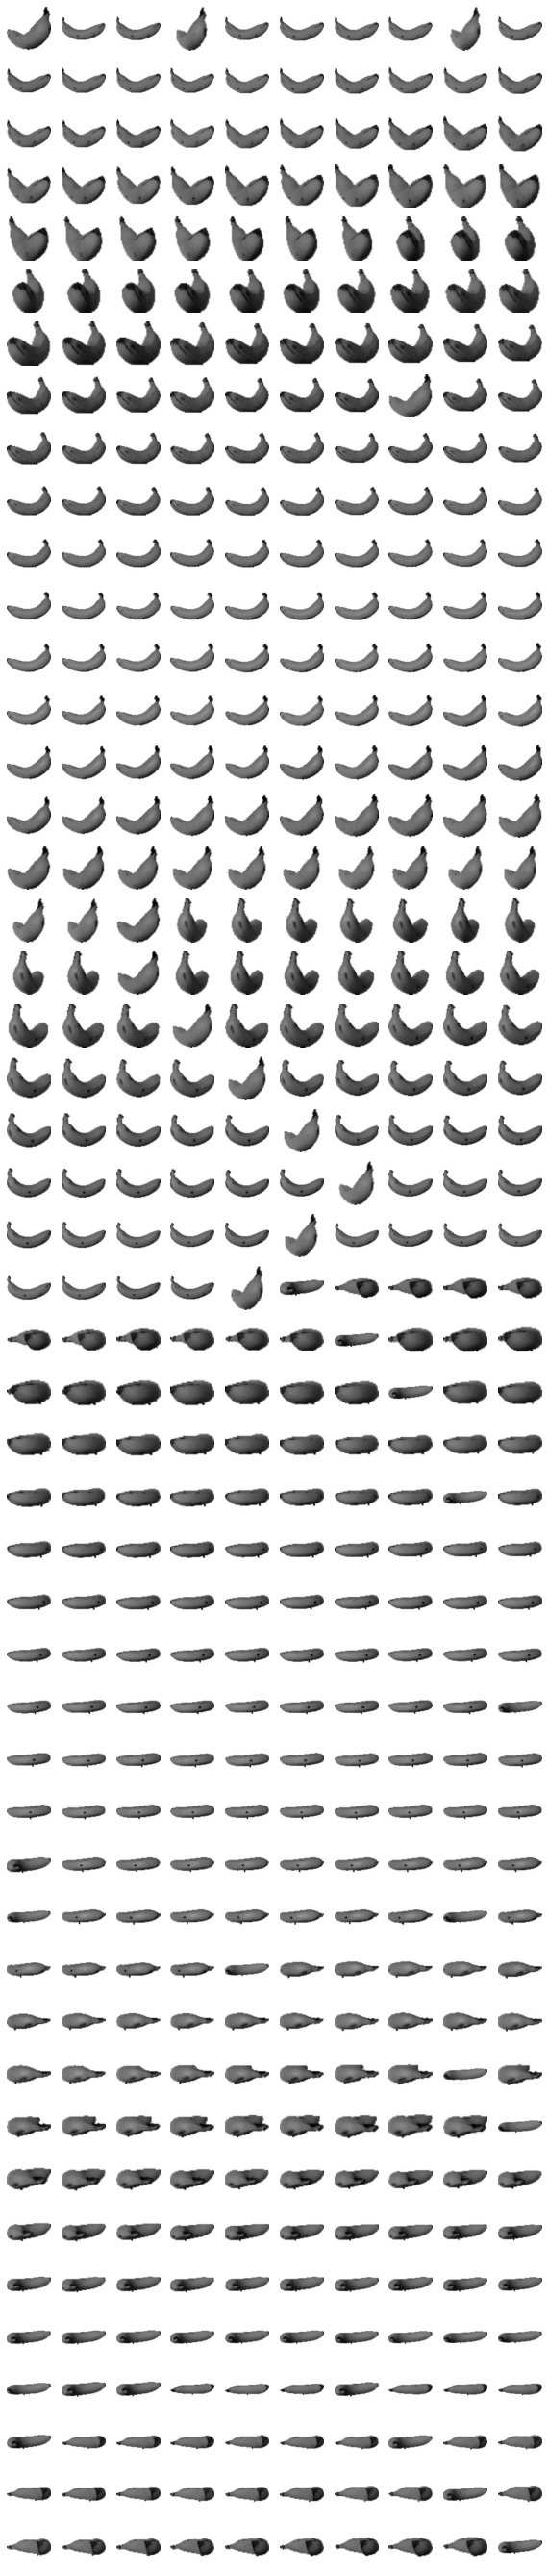

In [51]:
draw_fruits(fruits[km.labels_ == 1])

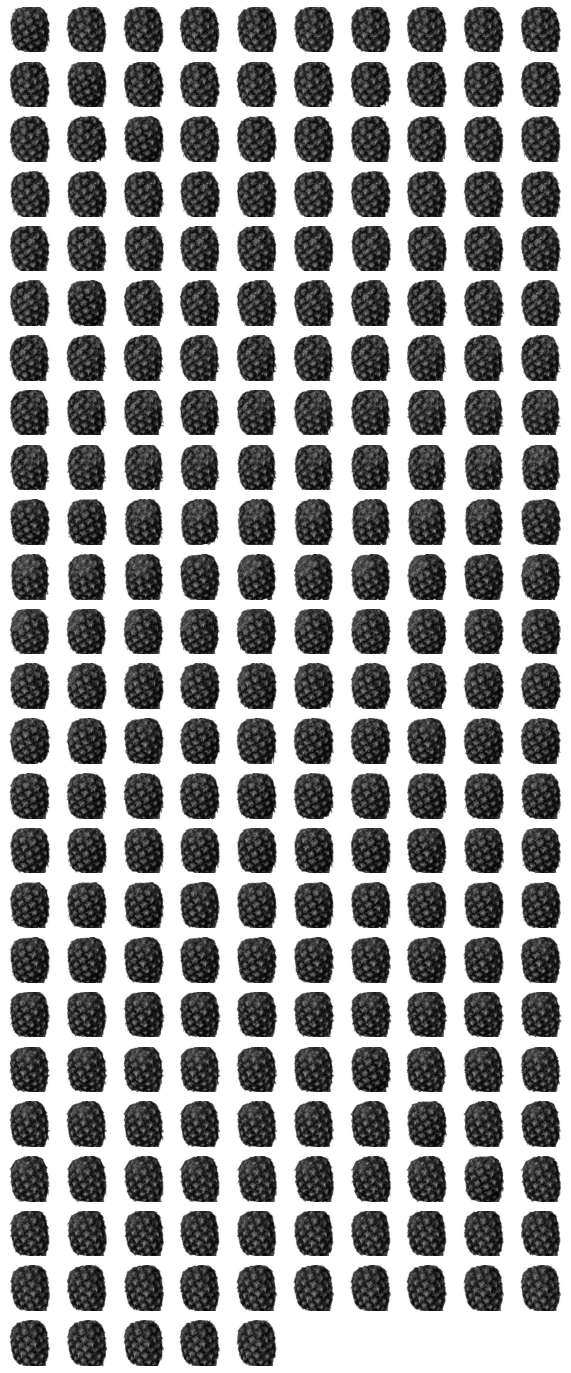

In [52]:
draw_fruits(fruits[km.labels_ == 2])

In [53]:
print(km.cluster_centers_.shape)

(3, 10000)


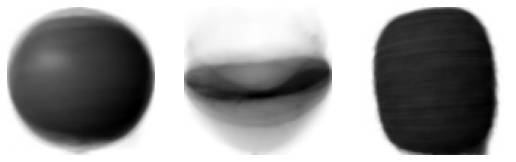

In [54]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

In [56]:
print(fruits_2d[0].shape)
print(fruits_2d[0:1].shape)  # 슬라이싱

(10000,)
(1, 10000)


In [57]:
print(km.transform(fruits_2d[0:1]))  # 
#[[ 4012.56512913 11813.39838108  8280.55337682]]
# 0번 사과와 가장 가까움 그래서 사과로 군집화될 것으로 예상됨

[[ 4012.56512913 11813.39838108  8280.55337682]]


In [61]:
print(km.predict(fruits_2d[0:1]))

[0]


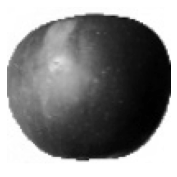

In [73]:
draw_fruits(fruits[0:1], ratio = 3)

In [79]:
print(km.n_iter_)  # the number of iterations (반복 횟수) -> n_iter_

4


In [ ]:
## Elbow Method(엘보우 방법)


In [84]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid(True)
